In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('_data/train.csv')
test = pd.read_csv('_data/test.csv')
challenge_data = pd.read_csv('_data/challenge_data.csv')

In [4]:
train.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


In [19]:
train[train.challenge_sequence.apply(lambda x: x in [11, 12, 13])].challenge.nunique()

4538

In [4]:
challenge_data.challenge_series_ID.nunique()

435

In [6]:
challenge_data.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,CI23478,2,SI2445,37.0,06-05-2006,AI563576,M,AOI100001,NaN
1,CI23479,2,SI2435,48.0,17-10-2002,AI563577,M,AOI100002,32.0
2,CI23480,1,SI2435,15.0,16-10-2002,AI563578,M,AOI100003,NaN
3,CI23481,1,SI2710,236.0,19-09-2003,AI563579,M,AOI100004,70.0
4,CI23482,2,SI2440,137.0,21-03-2002,AI563580,M,AOI100005,NaN


In [23]:
challenge_data.category_id.nunique()

194

In [13]:
print(challenge_data.challenge_series_ID.nunique())
series_count = challenge_data.groupby('challenge_series_ID').challenge_ID.nunique()
series_count.value_counts()

435


1      47
3      31
2      29
4      28
5      23
9      22
6      20
7      20
10     15
13     15
11     15
15     15
8      15
12     12
19     10
14      9
16      8
20      8
18      8
24      7
22      6
23      6
17      5
26      4
21      4
35      4
30      3
33      3
34      3
36      3
37      3
48      3
32      3
27      2
25      2
41      2
45      2
43      2
44      2
38      2
29      2
40      1
42      1
99      1
28      1
46      1
49      1
50      1
59      1
72      1
77      1
98      1
119     1
Name: challenge_ID, dtype: int64

In [22]:
challenge_data.describe(include='all')

,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
count,5606,5606.000000,5594,5254.000000,5606,5567,5509,5358,3765.000000
unique,5606,NaN,435,NaN,1145,3484,2,1717,NaN
top,CI26314,NaN,SI2652,NaN,12-12-2008,AI565468,M,AOI100201,NaN
freq,1,NaN,119,NaN,78,102,4834,351,NaN
mean,NaN,1.081877,NaN,348.362581,NaN,NaN,NaN,NaN,81.083665
std,NaN,0.316487,NaN,1044.810816,NaN,NaN,NaN,NaN,56.367797
min,NaN,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,22.000000
25%,NaN,1.000000,NaN,67.000000,NaN,NaN,NaN,NaN,36.000000
50%,NaN,1.000000,NaN,134.000000,NaN,NaN,NaN,NaN,66.000000
75%,NaN,1.000000,NaN,297.000000,NaN,NaN,NaN,NaN,113.000000


In [14]:
challenge_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
challenge_ID            5606 non-null object
programming_language    5606 non-null int64
challenge_series_ID     5594 non-null object
total_submissions       5254 non-null float64
publish_date            5606 non-null object
author_ID               5567 non-null object
author_gender           5509 non-null object
author_org_ID           5358 non-null object
category_id             3765 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.2+ KB


In [18]:
challenge_data.category_id.nunique()

194

In [24]:
challenge_data.category_id.value_counts()

29.0     412
39.0     208
69.0     170
122.0    170
36.0     102
28.0      99
70.0      98
46.0      73
23.0      73
41.0      71
30.0      62
48.0      55
81.0      55
86.0      51
71.0      50
97.0      50
32.0      50
31.0      47
54.0      45
57.0      45
67.0      42
92.0      42
214.0     42
37.0      41
60.0      41
162.0     41
77.0      38
45.0      37
50.0      37
47.0      36
        ... 
208.0      1
204.0      1
149.0      1
197.0      1
184.0      1
274.0      1
223.0      1
189.0      1
304.0      1
25.0       1
246.0      1
129.0      1
140.0      1
171.0      1
205.0      1
247.0      1
284.0      1
207.0      1
233.0      1
131.0      1
182.0      1
142.0      1
181.0      1
177.0      1
239.0      1
240.0      1
88.0       1
44.0       1
96.0       1
65.0       1
Name: category_id, Length: 194, dtype: int64

In [6]:
challenge_data.challenge_ID.nunique()

5606

In [5]:
pd.concat((train, test))['challenge'].nunique()

5502

In [27]:
pd.concat((train, test))['challenge'].value_counts()

CI23855    15184
CI23714    12458
CI24917    12372
CI23663    12077
CI24958    11333
CI23933    11060
CI25135    10482
CI24530    10166
CI23691     9532
CI23848     9090
CI25126     8550
CI24876     8351
CI23769     8218
CI24915     7845
CI24527     7623
CI25075     7282
CI24534     7111
CI23975     7075
CI23648     6816
CI24187     6697
CI25141     6521
CI24138     6470
CI25124     6018
CI24228     5984
CI24968     5920
CI26925     5794
CI24866     5786
CI23913     5668
CI24261     5627
CI24953     5385
           ...  
CI26039        1
CI24232        1
CI28613        1
CI25962        1
CI27481        1
CI25830        1
CI25704        1
CI24145        1
CI29019        1
CI25485        1
CI25746        1
CI26789        1
CI28939        1
CI27828        1
CI25898        1
CI24630        1
CI27486        1
CI28074        1
CI29061        1
CI28896        1
CI28787        1
CI27428        1
CI28378        1
CI28554        1
CI23563        1
CI29076        1
CI23592        1
CI25664       

In [15]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903916 entries, 0 to 903915
Data columns (total 4 columns):
user_sequence         903916 non-null object
user_id               903916 non-null int64
challenge_sequence    903916 non-null int64
challenge             903916 non-null object
dtypes: int64(2), object(2)
memory usage: 27.6+ MB


In [16]:
test.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397320 entries, 0 to 397319
Data columns (total 4 columns):
user_sequence         397320 non-null object
user_id               397320 non-null int64
challenge_sequence    397320 non-null int64
challenge             397320 non-null object
dtypes: int64(2), object(2)
memory usage: 12.1+ MB


In [8]:
test.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4577_1,4577,1,CI23855
1,4577_2,4577,2,CI23933
2,4577_3,4577,3,CI24917
3,4577_4,4577,4,CI24915
4,4577_5,4577,5,CI23714


In [9]:
train.shape, test.shape, challenge_data.shape

((903916, 4), (397320, 4), (5606, 9))

In [12]:
train.user_id.nunique(), test.user_id.nunique()

(69532, 39732)

In [16]:
set(train.user_id).intersection(test.user_id)

set()

In [17]:
pd.concat((train, test)).describe(include='all')

,user_sequence,user_id,challenge_sequence,challenge
count,1301236,1.301236e+06,1.301236e+06,1301236
unique,1301236,NaN,NaN,5502
top,59171_9,NaN,NaN,CI23855
freq,1,NaN,NaN,15184
mean,NaN,5.922015e+04,6.541989e+00,NaN
std,NaN,3.154130e+04,3.566727e+00,NaN
min,NaN,4.576000e+03,1.000000e+00,NaN
25%,NaN,3.190075e+04,3.000000e+00,NaN
50%,NaN,5.921000e+04,6.000000e+00,NaN
75%,NaN,8.653600e+04,9.000000e+00,NaN


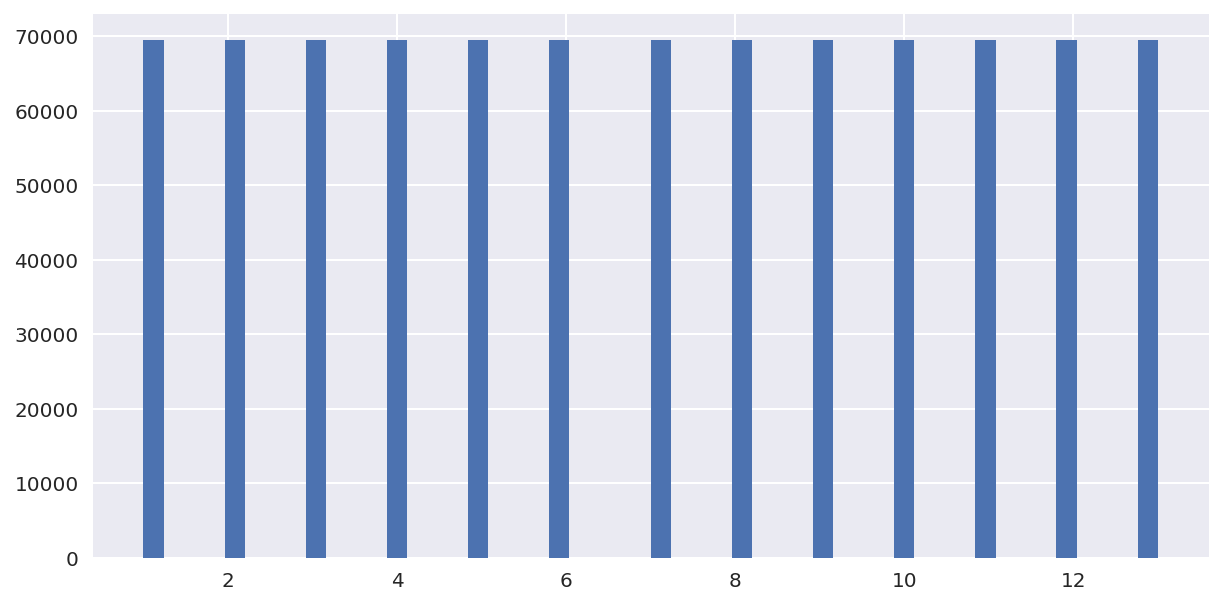

In [20]:
train.challenge_sequence.hist(bins=50, figsize=(10,5))

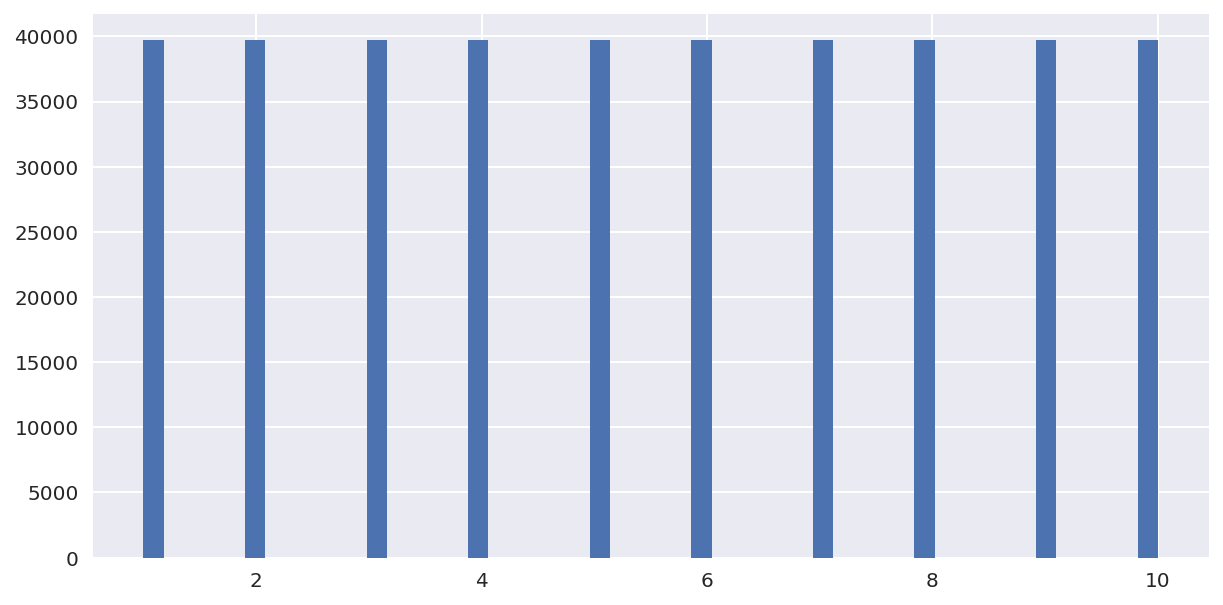

In [21]:
test.challenge_sequence.hist(bins=50, figsize=(10,5))